<a href="https://colab.research.google.com/github/leogils333/ML_AI/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slope of the Line (w)  [1.28]
Y Interceptor (b)  -12.000000000000007
 [13.6 20.  26.4 32.8 39.2]
1.3856406460551005


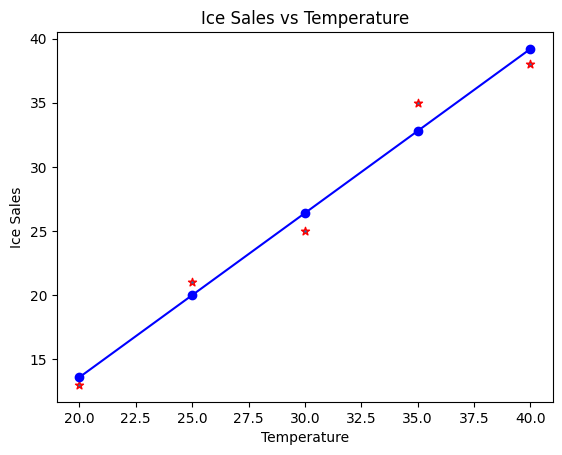

In [3]:
#NumPy is a powerful library for numerical computing in Python.
#NumPy arrays are designed for efficient storage and manipulation of numerical data
import numpy as npy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

temperature = [20, 25, 30, 35, 40] #Python List
icesales = [13, 21, 25, 35, 38]

X = npy.array([temperature]).T #numpy array
Y = npy.array(icesales);

liregmod = LinearRegression()
liregmod = liregmod.fit(X, Y)

liregmod_slope = liregmod.coef_
liregmod_intercept = liregmod.intercept_
print('Slope of the Line (w) ',liregmod_slope)
print('Y Interceptor (b) ',liregmod_intercept)

Y_predicte = liregmod.predict(X)

print('',Y_predicte)

rmse = npy.sqrt(mean_squared_error(Y, Y_predicte))
print(rmse)

plt.title('Ice Sales vs Temperature')

plt.xlabel('Temperature')
plt.ylabel('Ice Sales')
plt.scatter(temperature, icesales, marker='*', edgecolors='r')
plt.plot(temperature, Y_predicte, '-bo')
#plt.plot(X, Y_predicte)
plt.show()


